# 0. Transformer 세션 대체과제입니다. 

여러분 공부하시는데 헷갈리셨던 부분이나 어려우셨던 내용들을 가늠하여 논문과 코드 리뷰를 진행하며

빈칸을 채워보시시는 과제를 제출했습니다.

있는 빈칸들을 채워가며 세션 내용을 복습하는 과정을 의도한 과제입니다. 

**1. Paper Review** 부분에 총 11개의 빈칸이 있습니다.

**2. Code Practice** 부분에 총 12개의 빈칸이 있습니다.

코드 부분에는 Tensor의 구조를 주석으로로 첨부하니 세션 내용 중 

설명이 부족하여 이해가 어려우셨을 부분들도 보충할 수 있을 것이라 생각합니다.

과제 제출 자체보다 자율적 내용 이해에 초점을 맞추시고 편하게 진행해주시면 감사하겠습니다!

# 1. Paper Review

## Model Architecture

<p align="center"><img src="https://github.com/happy-jihye/Natural-Language-Processing/blob/main/images/transformer1.png?raw=1" width = "400" ></p>

Transformer는 Encoder-Decoder 모델을 따르며, 주요 architecture로는 **stacked self-attention, point-wise fully connected layers**를 사용합니다.

### Encoder

- Encoder는 모두 N개의 동일한 layer가 반복되는 형태입니다.(논문에서의 N = 6)
- 위의 그림에서도 볼 수 있다시피 Encoder layer는 **1. Multi-head Attention**과 **2. Feed Forward**의 2개의 layer로 구성됩니다.  
- 또한, 두개의 sub-layer에 **3. Add&Norm** 방식을 적용하여 성능을 높였으며, 이 계산을 쉽게하기 위해서 embedding layer와 2개의 sub-layer의 output의 dimension을 512로 맞춰주었습니다.


### Decoder

- Decoder도 Encoder와 마찬가지로 N = 6개의 layer를 반복하여 사용했습니다.
- Decoder는 3개의 sub-layer를 사용합니다.
  - 첫번째 sub-layer로는 **4. Masked Multi-head Attention**입니다. encoder와 유사하지만, 현재의 position에 이후 postion의 출력값이 나오는 걸 방지하기 위해 masking기법을 적용하였습니다.

    즉, self-attention시 현재 위치보다 뒤에 있는 단어는 attend 를 하지 못하게 됩니다.
    
  - 나머지 layer는 encoder와 비슷하지만, 두번째 sub-layer인  **5. Multi-head Attention**는 encoder의 output을 input으로 받는다는 점이 다릅니다.

## Attention

attention layer로는 2가지가 있습니다. 하나는 **6. Scaled Dot-Product Attention**이고, 다른 하나는 여러 개의 Scaled Dot-Product Attention를 사용한 **7. Multi-head Attention**입니다.

### (1) Scaled Dot-Product Attention

<p align="center"><img src="https://github.com/happy-jihye/Natural-Language-Processing/blob/main/images/transformer2.png?raw=1" width = "300" ></p>

**빈칸8. $\sqrt{d_K}$**  
**빈칸9. $QK^T$**

- Scaled Dot-Product Attention의 input은 3가지로, queries와 keys는 $d_k$ dimension을 가지고 values는 $d_v$ dimension을 가집니다. 
- 우리는 Query vec와 Key vec를 내적한 후 $\sqrt{d_K}$로 나누어주었습니다.
  - scaling을 하지 않으면, dot-product의 값이 너무나도 커져 softmax를 취했을 때의 gradient가 매우 작아집니다. 그렇게 되면, back-propagation 과정에서 기울기 소실 문제가 생길 수 있기 때문에 scaling의 과정이 필요합니다.

> attention function으로는 dot-product 함수 외에도 additive attention 함수도 있습니다. 
> 이 함수를 사용해도 좋지만 dot-product 함수가 행렬곱에 조금더 최적화되어있기 때문에 더 빠르고 space-efficient합니다.


$$ \text{Attention}(Q, K, V) =\text{softmax}(\frac{QK^T}{\sqrt{d_k}})V $$

### (2) Multi-Head Attention

<p align="center"><img src="https://github.com/happy-jihye/Natural-Language-Processing/blob/main/images/transformer3.png?raw=1" width = "300" ></p>

이 방식은 병렬화를 위해 전체 dimension에 대해 한번에 attention을 하지 않고, $h$번에 걸쳐 attention을 하는 방식입니다.

Q, K, V vector를 head개 만큼 나눈 후 attention을 해주고, 이를 다시 이어붙이는 방식으로 학습을 진행합니다.

$$ \begin{matrix}
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1,...,\text{head}_h)W^O\\
\text{where}~\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K,VW_i^V)
\end{matrix} $$

- parameter

$$ W_i^Q,~W_i^K\in\mathbb{R}^{d_{\text{model}}\times d_k}, W_i^V \in\mathbb{R}^{d_{\text{model}}\times d_k}, W^O \in \mathbb{R}^{hd_v\times d_{\text{model}}} $$ 

- 이 논문에서는 8개의 parallel한 attention layer(head)를 사용했습니다.

**빈칸10. $h$**
$$ d_k=d_v=d_{\text{model}}/ h = 64 $$

### Applications of Attention in Transformer

Transformer에서는 총 3가지의 multi-head attention을 사용합니다.

1. **Encoder self-attentinon**
  - self-attention에서의 Q, K, V vector는 모두 같은 layer인, 이전 encoder의 output에서 옵니다. 
  - Encoder에서는 이전 encoder layer의 모든 위치에 attend 할 수 있습니다.

2. **Masked self-attention(Decoder)**
  - decoder의 self-attention는 이전 decoder layer의 모든 위치에 attend 할 수는 있지만, 현재 위치 전까지만 attend 하도록 <u>masking</u>이라는 기법을 적용합니다.
  - 즉, "I love you" 라는 문장이 있을 때 `love`는 `I`만을, `you`는 `I`와 `love`를 참고할 수 있습니다.
  - 이는 **scaled dot-product attention**에서 현재 position 이후에 있는 sequence의 값을 음의 무한대값과 곱함으로써 구현하였습니다. masking된 값은 softmax function을 취했을 때 결과값이 0이 됩니다.


## Position-wise Feed Forward Networks

attention layer이외에도 **Fully connected Feed-Forward network**를 사용하였습니다. 이 layer는 두 개의 linear layer와 ReLU activation function으로 구성됩니다.

$$ \text{FFN}(x)=\max(0, xW_1+b_1)W_2+b_2 $$

**빈칸11.$ff$**  

input과 output의 dimension은 $d_{\text{model}}= 512$이며, inner-layer의 dimension은 $d_{ff} = 2048$입니다.
> Feed Forward NN의 inner layer에서 너무나도 많은 memory를 사용해 [Reformer](https://arxiv.org/abs/2001.04451)에서는 이를 *residual connection*과 *chunking*을 이용하여 개선하기도 합니다.




## Embeddings and Softmax

- 다른 sequence transduction model처럼 input/output을 $d_{\text{model}}$로 **embedding** 합니다. 
- **linear transformation**과 **softmax function**을 이용해서 decoder의 output을 *predicted next-token probabilities*로 바꿔줍니다.

- 특이한 점은 transformer model의 두개의 embedding layer와 이 softmax function의 weight가 같다는 점입니다. 즉, linear transformation에서 모두 같은 weight를 사용합니다.

## Positional Encoding 

transformer는 recurrent나 convolution을 사용하지 않았기 때문에 위치에 대한 정보를 줘야합니다. **positional encodding**은 embedding과 차원이 동일하며($d_model$), embedding vector와 더함으로써 위치정보를 넣어줍니다.

$$ \begin{matrix}
PE_{(pos,2i)}=\sin(pos/10000^{2i/d_{\text{model}}})\\
PE_{(pos,2i+1)}=\cos(pos/10000^{2i/d_{\text{model}}})
\end{matrix} $$

positional embedding도 학습이 가능하지만, sinuidal 함수를 이용해도 비슷한 성능이 나와 위의 함수를 사용했다고 논문에서는 말하고 있습니다.

# 2. Code Practice

## Preparing Data

In [1]:
!apt install python3.7
!pip install -U torchtext==0.6.0
!python -m spacy download en
!python -m spacy download de

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7 python3.7-minimal
0 upgraded, 4 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,530 kB of archives.
After this operation, 23.3 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-minimal amd64 3.7.16-1+focal1 [588 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-minimal amd64 3.7.16-1+focal1 [1,808 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-stdlib amd64 3.7.16-1+focal1 [1,773 kB]
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7 amd64 3.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchtext.datasets import Multi30k
from torchtext.data import Field, BucketIterator

import spacy
import numpy as np

import random
import math
import time

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### **Tokenizers**
- tokenizers는 문장을 개별 token으로 변환해주는 데 사용됩니다.
  - e.g. "good morning!" becomes ["good", "morning", "!"]
- nlp를 쉽게 할 수 있도록 도와주는 python package인 `spaCy`를 이용하여, token화를 할 예정입니다.


In [3]:
import spacy
from spacy.lang.de.examples import sentences 

spacy_de = spacy.load("de_core_news_sm")
doc = spacy_de(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Die ganze Stadt ist ein Startup: Shenzhen ist das Silicon Valley für Hardware-Firmen
Die DET nk
ganze ADJ nk
Stadt NOUN sb
ist AUX ROOT
ein DET nk
Startup NOUN pd
: PUNCT punct
Shenzhen NOUN pd
ist AUX cj
das DET nk
Silicon PROPN pnc
Valley PROPN sb
für ADP mnr
Hardware-Firmen NOUN nk


In [4]:
from spacy.lang.en.examples import sentences 


spacy_en = spacy.load("en_core_web_sm")
doc = spacy_en(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple is looking at buying U.K. startup for $1 billion
Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [5]:
def tokenize_de(text):
  return [tok.text for tok in spacy_de.tokenizer(text)]

def tokenize_en(text):
  return [tok.text for tok in spacy_en.tokenizer(text)]

다음으로는 **Field** 라이브러리를 사용하여 데이터를 처리합니다.
 
`batch_first = True`를 이용하여 미니 batch의 차원을 맨 앞으로 하여 데이터를 불러옵니다.

**빈칸12. tokenize_de** <br>
**빈칸13. tokenize_en** <br>
구조 : 독일어 -> 영어 번역

In [6]:
SRC = Field(tokenize= tokenize_de,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True)

TRG = Field(tokenize= tokenize_en,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True)

- dataset으로는 [Multi30k dataset](https://github.com/multi30k/dataset)을 사용하였습니다. 이는 약 3만개의 영어, 독일어, 프랑스어 문장이 있는 데이터이며 각 문장 당 12개의 단어가 있습니다.
- `exts`는 source와 target으로 사용할 언어를 지정합니다.

In [7]:
train_data, valid_data, test_data = Multi30k.splits(exts= ('.de', '.en'),
                                                    fields = (SRC, TRG))

downloading training.tar.gz


training.tar.gz: 100%|██████████| 1.21M/1.21M [00:01<00:00, 908kB/s] 


downloading validation.tar.gz


validation.tar.gz: 100%|██████████| 46.3k/46.3k [00:00<00:00, 240kB/s]


downloading mmt_task1_test2016.tar.gz


mmt_task1_test2016.tar.gz: 100%|██████████| 66.2k/66.2k [00:00<00:00, 219kB/s]


In [8]:
print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of training examples: 29000
Number of validation examples: 1014
Number of testing examples: 1000


In [9]:
print(len(vars(train_data.examples[0])['src']))
print(len(vars(train_data.examples[1])['src']))

print(vars(train_data.examples[0]))
print(vars(train_data.examples[1]))

13
8
{'src': ['zwei', 'junge', 'weiße', 'männer', 'sind', 'im', 'freien', 'in', 'der', 'nähe', 'vieler', 'büsche', '.'], 'trg': ['two', 'young', ',', 'white', 'males', 'are', 'outside', 'near', 'many', 'bushes', '.']}
{'src': ['mehrere', 'männer', 'mit', 'schutzhelmen', 'bedienen', 'ein', 'antriebsradsystem', '.'], 'trg': ['several', 'men', 'in', 'hard', 'hats', 'are', 'operating', 'a', 'giant', 'pulley', 'system', '.']}


아래부터 함수의 인자들을 채우시면 됩니다.

### Build Vocabulary
- `build_vocab`함수를 이용하여 각 token을 indexing해줍니다. 이때, source와 target의 vocabulary는 다릅니다.
- `min_freq`를 사용하여 최소 2번 이상 나오는 단어들만 vocabulary에 넣어주었습니다. 이때, 한번만 나오는 단어는 `<unk>` token으로 변환됩니다.
- 이때, vocabulary는 **training set**에서만 만들어져야합니다. *(validation/test set에 대해서는 만들어지면 안됨!!)* 

In [10]:
SRC.build_vocab(train_data, min_freq = 2)
TRG.build_vocab(train_data, min_freq = 2)

In [11]:
print(f"Unique tokens in source (de) vocabulary: {len(SRC.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TRG.vocab)}")

Unique tokens in source (de) vocabulary: 7853
Unique tokens in target (en) vocabulary: 5893


### Create the iterators
- `BucketIterator`를 이용하여 batch size별로 token들을 묶고, 어휘를 읽을 수 있는 token에서 index로 변환해줍니다.

In [12]:
# for using GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    device = device
)

## Building the Model

### Encoder

<p align="center"><img src="https://github.com/happy-jihye/Natural-Language-Processing/blob/main/images/transformer4.png?raw=1" width = "200" ></p>


**Positional Encoding**

Transformer는 recurrent가 아니기 때문에 위치 정보를 주기 위해서는 *positional encoding*이 필요합니다. 

이번에 구현한 notebook에서는 Transformer 논문의 고정된 정적 임베딩(fixed static embedding)인  positional encoding을 사용하는 대신, BERT에서 사용된 **postional embedding**을 사용했습니다. (논문의 sin함수로 된 positional encoding 관련 코드는 [이 글](http://nlp.seas.harvard.edu/2018/04/03/attention.html#positional-encoding) 참고)


**빈칸14. EncoderLayer** <br>
참고 : https://gaussian37.github.io/dl-concept-transformer/

In [14]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()

        self.device = device
        
        ''' Input Embedding '''
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        # <sos> token부터 문장의 최대 길이로 설정한 100까지 positional embedding을 함.
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        ''' Multiple Encoder '''
        # 논문에서는 N=6개의 encoder layer를 사용하였음
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout, 
                                                  device) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len = src.shape[1]
        
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)

        #pos = [batch size, src len]
        
        # src 문장의 embedding vector와 positional vector를 더해줌
        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        
        #src = [batch size, src len, hid dim]
        
        for layer in self.layers:
            src = layer(src, src_mask)
            
        #src = [batch size, src len, hid dim]
            
        return src

#### Encoder layer

두 개의 sub layer 외에도 [Layer Normalization](https://arxiv.org/abs/1607.06450) layer 를 추가하여 성능을 높였습니다.


In [15]:
class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout, 
                 device):
        super().__init__()
        
        ''' Multi Head self-Attention '''        
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)

        ''' Positional FeedForward Layer'''
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len] 
                
        #self attention
        _src, _ = self.self_attention(src, src, src, src_mask)
        
        #dropout, residual connection and layer norm
        src = self.self_attn_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        #positionwise feedforward
        _src = self.positionwise_feedforward(src)
        
        #dropout, residual and layer norm
        src = self.ff_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        return src

### Multi Head Attention Layer

**빈칸15. n_heads** <br>
**빈칸16. 2** <br>
**빈칸17. 1**

In [17]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        # encoder의 Q, K, V는 모두 같은 space에서 옵니다.
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
        
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]
                
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        
        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        #energy = [batch size, n heads, query len, key len]
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        attention = torch.softmax(energy, dim = -1)
                
        #attention = [batch size, n heads, query len, key len]
                
        x = torch.matmul(self.dropout(attention), V)
        
        #x = [batch size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        #x = [batch size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        #x = [batch size, query len, hid dim]
        
        x = self.fc_o(x)
        
        #x = [batch size, query len, hid dim]
        
        return x, attention

### Position-wise Feedforward Layer


**빈칸18. relu**

In [18]:
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [batch size, seq len, hid dim]
        
        x = self.dropout(torch.relu(self.fc_1(x)))
        
        #x = [batch size, seq len, pf dim]
        
        x = self.fc_2(x)
        
        #x = [batch size, seq len, hid dim]
        
        return x

### Decoder
<p align="center"><img src="https://github.com/happy-jihye/Natural-Language-Processing/blob/main/images/transformer5.png?raw=1" width = "200" ></p>

In [19]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()
        
        self.device = device
        
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([DecoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim, 
                                                  dropout, 
                                                  device)
                                     for _ in range(n_layers)])
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
                
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
                            
        #pos = [batch size, trg len]
            
        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
                
        #trg = [batch size, trg len, hid dim]
        
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        output = self.fc_out(trg)
        
        #output = [batch size, trg len, output dim]
            
        return output, attention

#### Decoder Layer

**빈칸20. self_attention** <br>
**빈칸21. ff_layer_norm**

In [35]:
class DecoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device):
        super().__init__()
        
        ''' Multi Head self Attention'''
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)

        ''' Encoder-decoder attention'''
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)

        ''' Positionwise FeedForward Layer'''
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        #self attention
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        
        #dropout, residual connection and layer norm
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
            
        #trg = [batch size, trg len, hid dim]
            
        #encoder attention
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        
        #dropout, residual connection and layer norm
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
                    
        #trg = [batch size, trg len, hid dim]
        
        #positionwise feedforward
        _trg = self.positionwise_feedforward(trg)
        
        #dropout, residual and layer norm
        trg = self.ff_layer_norm(trg + self.dropout(_trg))
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return trg, attention

### Seq2Seq


**빈칸22. !=**

In [36]:
class Seq2Seq(nn.Module):
    def __init__(self, 
                 encoder, 
                 decoder, 
                 src_pad_idx, 
                 trg_pad_idx, 
                 device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        
        #src = [batch size, src len]
        
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        #src_mask = [batch size, 1, 1, src len]

        return src_mask
    
    def make_trg_mask(self, trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
        
        #trg_sub_mask = [trg len, trg len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

    def forward(self, src, trg):
        
        #src = [batch size, src len]
        #trg = [batch size, trg len]
                
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        
        #src_mask = [batch size, 1, 1, src len]
        #trg_mask = [batch size, 1, trg len, trg len]
        
        enc_src = self.encoder(src, src_mask)
        
        #enc_src = [batch size, src len, hid dim]
                
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        
        #output = [batch size, trg len, output dim]
        #attention = [batch size, 23. 빈칸, trg len, src len]
        
        return output, attention


## Training the Seq2Seq Model

In [37]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device)

In [38]:
SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [39]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 9,038,341 trainable parameters


- 초기 가중치값은 $\mathcal{N}(0, 0.01)$의 정규분포로부터 얻었습니다.(논문에서는 세이비어 유니폼)

In [40]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights);

- optimizer함수로는 `Adam`을 사용하였고, loss function으로는 `CrossEntropyLoss`를 사용하였습니다. 또한, `<pad>` token에 대해서는 loss 계산을 하지 않도록 조건을 부여했습니다.

In [41]:
LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

In [42]:
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

### Training

In [43]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    
    for i, batch in enumerate(iterator):
        
        src = batch.src
        trg = batch.trg
        
        optimizer.zero_grad()
        
        output, _ = model(src, trg[:,:-1])
                
        #output = [batch size, trg len - 1, output dim]
        #trg = [batch size, trg len]
            
        output_dim = output.shape[-1]
            
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)
                
        #output = [batch size * trg len - 1, output dim]
        #trg = [batch size * trg len - 1]
            
        loss = criterion(output, trg)
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

### Evaluation

In [44]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output, _ = model(src, trg[:,:-1])
            
            #output = [batch size, trg len - 1, output dim]
            #trg = [batch size, trg len]
            
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)
            
            #output = [batch size * trg len - 1, output dim]
            #trg = [batch size * trg len - 1]
            
            loss = criterion(output, trg)

            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [45]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### Train the model through multiple epochs

In [46]:
N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut6-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

Epoch: 01 | Time: 0m 17s
	Train Loss: 4.242 | Train PPL:  69.536
	 Val. Loss: 3.013 |  Val. PPL:  20.353
Epoch: 02 | Time: 0m 18s
	Train Loss: 2.809 | Train PPL:  16.585
	 Val. Loss: 2.291 |  Val. PPL:   9.887
Epoch: 03 | Time: 0m 17s
	Train Loss: 2.233 | Train PPL:   9.328
	 Val. Loss: 1.978 |  Val. PPL:   7.225
Epoch: 04 | Time: 0m 17s
	Train Loss: 1.882 | Train PPL:   6.566
	 Val. Loss: 1.782 |  Val. PPL:   5.939
Epoch: 05 | Time: 0m 17s
	Train Loss: 1.639 | Train PPL:   5.148
	 Val. Loss: 1.693 |  Val. PPL:   5.437
Epoch: 06 | Time: 0m 17s
	Train Loss: 1.452 | Train PPL:   4.272
	 Val. Loss: 1.643 |  Val. PPL:   5.173
Epoch: 07 | Time: 0m 17s
	Train Loss: 1.302 | Train PPL:   3.677
	 Val. Loss: 1.618 |  Val. PPL:   5.045
Epoch: 08 | Time: 0m 17s
	Train Loss: 1.177 | Train PPL:   3.245
	 Val. Loss: 1.606 |  Val. PPL:   4.984
Epoch: 09 | Time: 0m 17s
	Train Loss: 1.069 | Train PPL:   2.913
	 Val. Loss: 1.605 |  Val. PPL:   4.979
Epoch: 10 | Time: 0m 17s
	Train Loss: 0.975 | Train PPL

In [47]:
model.load_state_dict(torch.load('tut6-model.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

| Test Loss: 1.669 | Test PPL:   5.307 |


## Inference


In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [49]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):
    
    model.eval()
        
    if isinstance(sentence, str):
        nlp = spacy.load('de_core_news_sm')
        tokens = [token.text.lower() for token in nlp(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    
    src_mask = model.make_src_mask(src_tensor)
    
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)
        
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        
        pred_token = output.argmax(2)[:,-1].item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:], attention

In [50]:
def display_attention(sentence, translation, attention, n_heads = 8, n_rows = 4, n_cols = 2):
    
    assert n_rows * n_cols == n_heads
    
    fig = plt.figure(figsize=(15,25))
    
    for i in range(n_heads):
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        
        _attention = attention.squeeze(0)[i].cpu().detach().numpy()

        cax = ax.matshow(_attention, cmap='bone')

        ax.tick_params(labelsize=12)
        ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], 
                           rotation=45)
        ax.set_yticklabels(['']+translation)

        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()

In [51]:
example_idx = 8

src = vars(train_data.examples[example_idx])['src']
trg = vars(train_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

src = ['eine', 'frau', 'mit', 'einer', 'großen', 'geldbörse', 'geht', 'an', 'einem', 'tor', 'vorbei', '.']
trg = ['a', 'woman', 'with', 'a', 'large', 'purse', 'is', 'walking', 'by', 'a', 'gate', '.']


In [52]:
translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg = {translation}')

predicted trg = ['a', 'woman', 'with', 'a', 'large', 'purse', 'walks', 'by', 'a', 'gate', '.', '<eos>']


<ipython-input-50-8546ab0d7ba0>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'],
<ipython-input-50-8546ab0d7ba0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+translation)


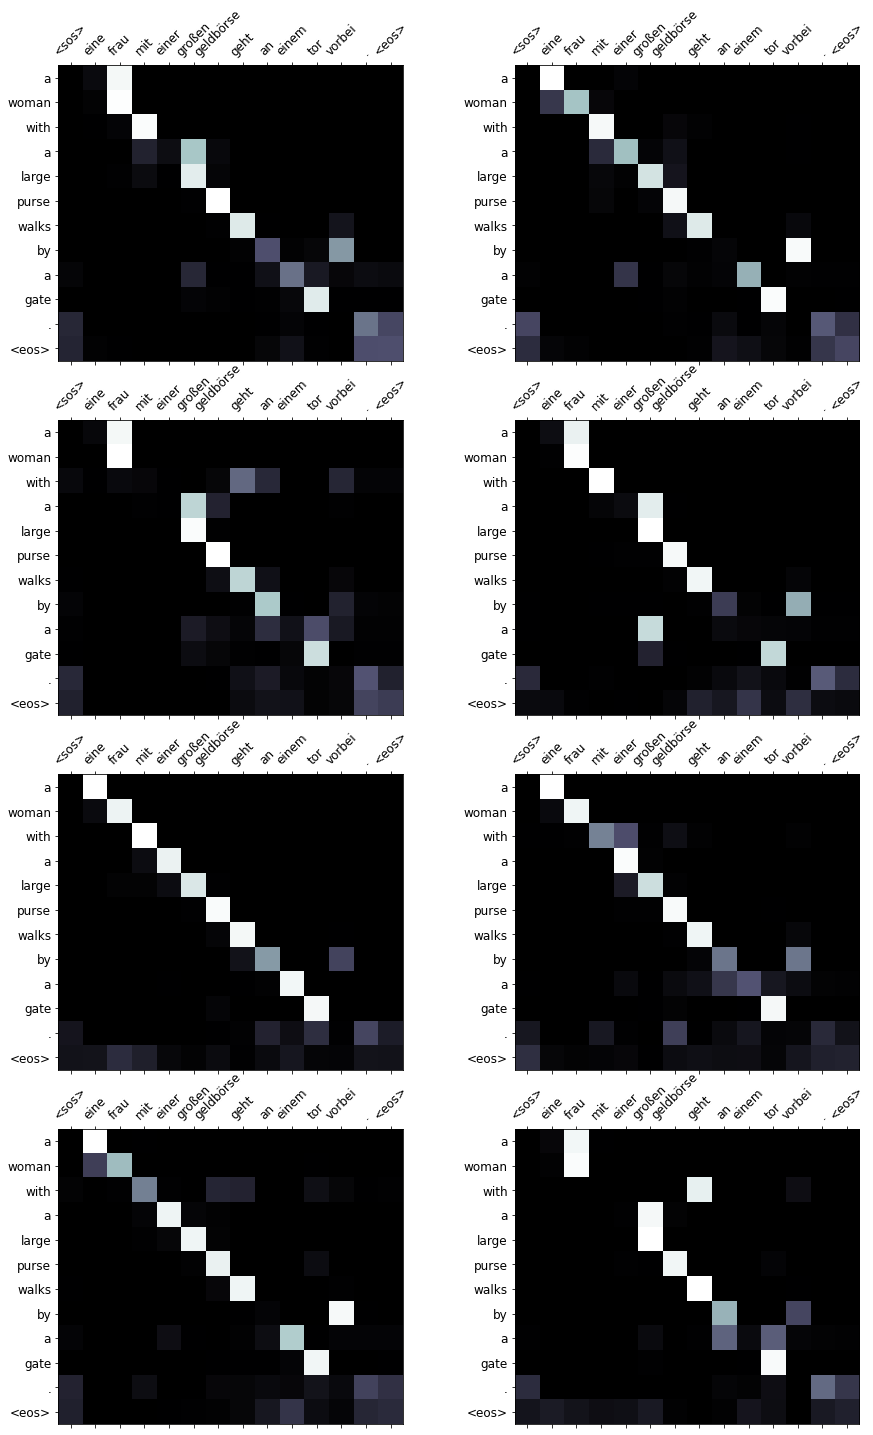

In [53]:
display_attention(src, translation, attention)

In [54]:
example_idx = 6

src = vars(valid_data.examples[example_idx])['src']
trg = vars(valid_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

src = ['ein', 'brauner', 'hund', 'rennt', 'dem', 'schwarzen', 'hund', 'hinterher', '.']
trg = ['a', 'brown', 'dog', 'is', 'running', 'after', 'the', 'black', 'dog', '.']


In [55]:
translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg = {translation}')

predicted trg = ['a', 'brown', 'dog', 'chases', 'the', 'black', 'dog', '.', '<eos>']


<ipython-input-50-8546ab0d7ba0>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'],
<ipython-input-50-8546ab0d7ba0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+translation)


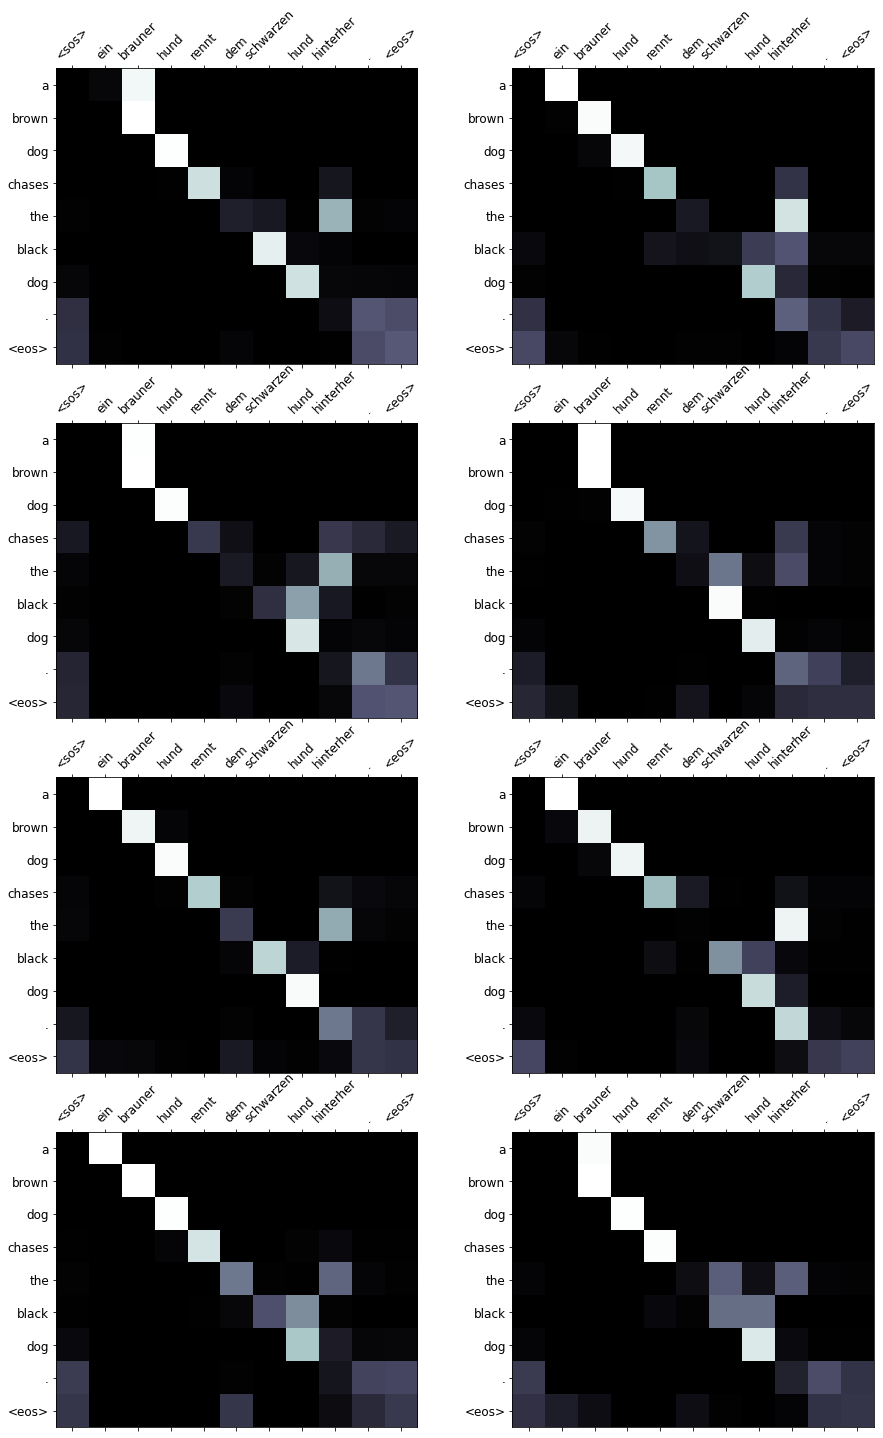

In [56]:
display_attention(src, translation, attention)

## BLEU

In [57]:
from torchtext.data.metrics import bleu_score

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):
    
    trgs = []
    pred_trgs = []
    
    for datum in data:
        
        src = vars(datum)['src']
        trg = vars(datum)['trg']
        
        pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)
        
        #cut off <eos> token
        pred_trg = pred_trg[:-1]
        
        pred_trgs.append(pred_trg)
        trgs.append([trg])
        
    return bleu_score(pred_trgs, trgs)

In [58]:
bleu_score = calculate_bleu(test_data, SRC, TRG, model, device)

print(f'BLEU score = {bleu_score*100:.2f}')

BLEU score = 35.68
